# Company A - Data Preliminary Analysis

* PCA / ICA explained variance & visualization with t-SNE
* SVM Lasso with Regularization (Recursive Feature Elimination) for Magnitude of initial feature Feature elimination  
* Simple dense NN (no temporal)


## Import packages

In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn
import scipy
import sklearn

In [7]:
from tensorflow.keras.models import (Model, Sequential)
from tensorflow.keras.layers import (Input, Dense, Flatten, RepeatVector, Reshape, MaxPooling1D, UpSampling1D, BatchNormalization)
#from tensorflow.keras.layers.core import Lambda
from tensorflow.keras.optimizers import (Adam, SGD)
from tensorflow.keras.regularizers import l1

## Load data

In [44]:
data = pd.read_pickle('mod_data.pkl')

print("Column headings:")
print(data.columns)

Column headings:
Index(['Product Made', 'Air consumption', 'Gas consumption', 'Exhaust gas',
       'Speed', 'Pressure', 'Kiln Feed', 'Dust Addition',
       'Moisture Beltweigher', 'Moisture CLC', 'Additive B', 'Additive C',
       'CLC CaO', 'CLC Na2O', 'Surface Area', 'Compacite', 'd50', 'd90',
       'B₂O₃', 'Na₂O'],
      dtype='object')


## Normalize data

In [54]:
from sklearn import preprocessing
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()
# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(data.drop(["Product Made"], axis=1))
# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)

## PCA + tSNE

In [67]:
from sklearn.decomposition import PCA
pca = PCA(8)
result = pca.fit_transform(df_normalized)

Text(0, 0.5, 'cumulative explained variance')

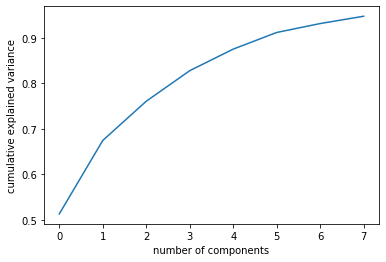

In [68]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [80]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, verbose=True, perplexity=20, n_iter=10000)
tsne_results = tsne.fit_transform(result)
tsne_results.shape

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 1116 samples in 0.001s...
[t-SNE] Computed neighbors for 1116 samples in 0.064s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1116
[t-SNE] Computed conditional probabilities for sample 1116 / 1116
[t-SNE] Mean sigma: 0.132051
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.040970
[t-SNE] KL divergence after 4850 iterations: 0.328491


(1116, 3)

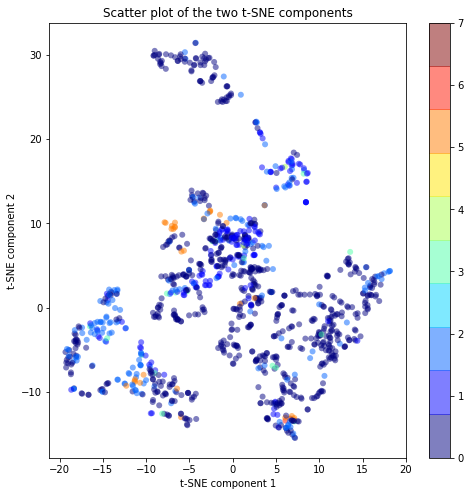

In [81]:
import matplotlib.cm as cm

plt.figure(figsize=(8,8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1],
            c=data["Product Made"], edgecolor='none', alpha=0.5,
            cmap=cm.get_cmap('jet', 10))
plt.title("Scatter plot of the two t-SNE components")
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.colorbar();

## ICA +tSNE

In [69]:
from sklearn.decomposition import FastICA
numICAcomp = 8
ica = FastICA(n_components=numICAcomp, max_iter=2000, tol=0.01)
ICA = ica.fit_transform(df_normalized)

In [76]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, verbose=True, perplexity=20, n_iter=10000)
tsne_results = tsne.fit_transform(ICA)
tsne_results.shape

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 1116 samples in 0.004s...
[t-SNE] Computed neighbors for 1116 samples in 0.069s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1116
[t-SNE] Computed conditional probabilities for sample 1116 / 1116
[t-SNE] Mean sigma: 0.018709
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.530304
[t-SNE] KL divergence after 3900 iterations: 0.379156


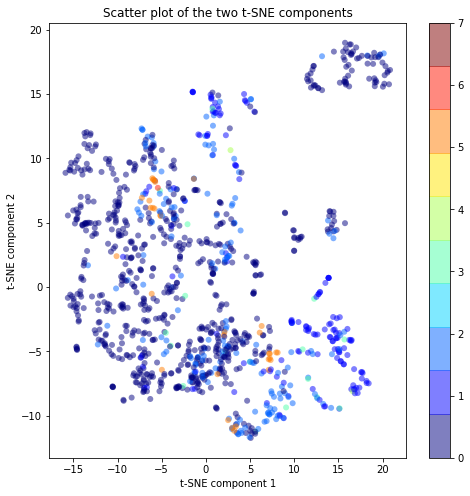

In [78]:
import matplotlib.cm as cm

plt.figure(figsize=(8,8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1],
            c=data["Product Made"], edgecolor='none', alpha=0.5,
            cmap=cm.get_cmap('jet', 10))
plt.title("Scatter plot of the two t-SNE components")
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.colorbar();

## Dense NN

In [12]:
num_class = len(data["Product Made"].unique())

In [21]:
model = Sequential([
                        Dense(100, activation='relu'),
                        Dense(100, activation='relu'),
                        Dense(100, activation='relu'),
                        Dense(100, activation='relu'),
                        Dense(100, activation='relu'),
                        Dense(2, activation='softmax') 
                    ])

In [22]:
# set learning rate
lr = 2e-5

# compile model
#model.compile(optimizer=Adam(lr), loss='mse')
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr), metrics=['accuracy']) # categorical loss, SGD

In [464]:
# fits the model
model.fit(x_train, y_train, epochs=15, batch_size=100)

Train on 80000 samples, validate on 20000 samples
Epoch 1/15
80000/80000 [==============================] - 90s 1ms/step - loss: 0.5791 - accuracy: 0.7037 - val_loss: 0.5566 - val_accuracy: 0.7183
Epoch 2/15
80000/80000 [==============================] - 90s 1ms/step - loss: 0.5523 - accuracy: 0.7167 - val_loss: 0.5608 - val_accuracy: 0.7161
Epoch 3/15
80000/80000 [==============================] - 91s 1ms/step - loss: 0.5505 - accuracy: 0.7175 - val_loss: 0.5563 - val_accuracy: 0.7167
Epoch 4/15
80000/80000 [==============================] - 146s 2ms/step - loss: 0.5515 - accuracy: 0.7174 - val_loss: 0.5529 - val_accuracy: 0.7166
Epoch 5/15
80000/80000 [==============================] - 120s 1ms/step - loss: 0.5510 - accuracy: 0.7188 - val_loss: 0.5551 - val_accuracy: 0.7160
Epoch 6/15
80000/80000 [==============================] - 101s 1ms/step - loss: 0.5498 - accuracy: 0.7182 - val_loss: 0.5561 - val_accuracy: 0.7174
Epoch 7/15
80000/80000 [==============================] - 95s 1ms